# Precision Recall Tradeoff



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve

In [2]:
digit = load_digits()

In [6]:
X = digit.data
y = digit.target == 9 #making this "is it a 9"?

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9711111111111111

In [8]:
from sklearn.dummy import DummyClassifier

In [9]:
dum = DummyClassifier()
dum.fit(X_train, y_train)
dum.score(X_test, y_test)

0.8133333333333334

In [10]:
lr_pred = clf.predict(X_test)
dum_pred = dum.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
print(confusion_matrix(lr_pred, y_test))

[[395   9]
 [  4  42]]


In [13]:
from sklearn.datasets import load_breast_cancer

In [14]:
cancer = load_breast_cancer()

In [15]:
X = cancer.data
y = cancer.target

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
pred = clf.predict(X_test)
confusion_matrix(pred, y_test)

array([[51,  2],
       [ 6, 84]], dtype=int64)

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.96      0.89      0.93        57
          1       0.93      0.98      0.95        86

avg / total       0.94      0.94      0.94       143



### Changing the Threshold

In [21]:
lowered_thresh = clf.decision_function(X_test) > -1.0

In [22]:
print(classification_report(y_test,  lowered_thresh))

             precision    recall  f1-score   support

          0       0.96      0.84      0.90        57
          1       0.90      0.98      0.94        86

avg / total       0.93      0.92      0.92       143



In [23]:
from sklearn.metrics import precision_recall_curve

In [24]:
precision, recall, thresholds = precision_recall_curve(y_test, clf.decision_function(X_test))

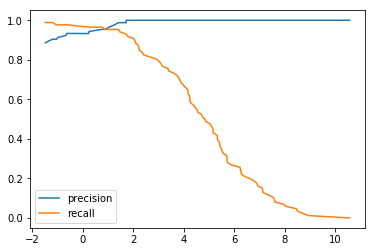

In [25]:
plt.plot(thresholds, precision[1:],  label = 'precision')
plt.plot(thresholds, recall[1:], label = 'recall')
plt.legend()

             precision    recall  f1-score   support

          0       0.89      0.96      0.93        53
          1       0.98      0.93      0.95        90

avg / total       0.95      0.94      0.94       143



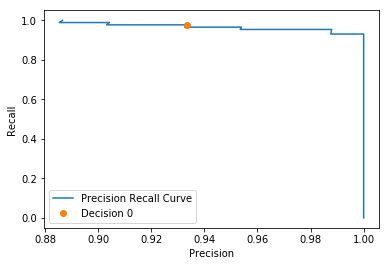

In [26]:
smallest = np.argmin(np.abs(thresholds))
plt.plot(precision, recall, label = 'Precision Recall Curve')
plt.plot(precision[smallest], recall[smallest], 'o', label = 'Decision 0')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend();
print(classification_report(pred, y_test))

### ROC Curve

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, clf.decision_function(X_test))

Text(0,0.5,'True Positive Rate')

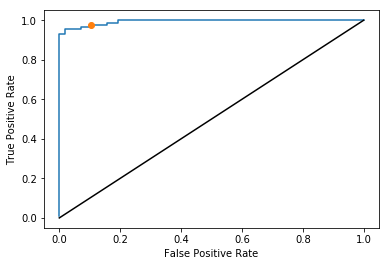

In [28]:
smallest = np.argmin(np.abs(thresholds))
plt.plot(fpr, tpr)
plt.plot(fpr[smallest], tpr[smallest], 'o')
plt.plot(fpr, fpr, c = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [29]:
from sklearn.metrics import roc_auc_score

In [30]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.9934720522235823

### Using Metrics in Model Selection

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
cross_val_score(clf, X_train, y_train, scoring = 'accuracy')

array([0.94405594, 0.92957746, 0.94326241])

In [33]:
cross_val_score(clf, X_train, y_train, scoring = 'precision')

array([0.93684211, 0.94444444, 0.93617021])

In [34]:
cross_val_score(clf, X_train, y_train, scoring = 'recall')

array([0.97802198, 0.94444444, 0.97777778])

In [35]:
cross_val_score(clf, X_train, y_train, scoring = 'roc_auc')

array([0.97400676, 0.98974359, 0.99411765])

In [36]:
params = {'C': [0.1, 1.0, 5, 10, 50, 100, 400, 1000]}
grid = GridSearchCV(clf, param_grid=params, scoring = 'roc_auc')

In [37]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1.0, 5, 10, 50, 100, 400, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [39]:
grid.best_params_

{'C': 10}